# 의사결정나무_분류

In [1]:
execfile('setting.py')

In [2]:
%matplotlib inline 

In [3]:
def fun_data_layout(v_data):
    print("Data 구조:", v_data.shape)
    print()
    print("변수 : ", v_data.columns)
    print()
    #print(v_data.head()) <- Text format... 식별 불편
    # v_data.head()  <- 직접 적용 안됨

## 데이터구성하기

In [4]:
df_raw = pd.read_csv(path2+"유방암.csv",encoding='euc-kr')
df_raw

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0          음성        15.12         16.68           98.78      716.6   
1          양성        10.80          9.71           68.77      357.6   
2          음성        18.31         18.58          118.60     1041.0   
3          양성        14.92         14.93           96.45      686.9   
4          양성        12.89         13.12           81.89      515.9   
..        ...          ...           ...             ...        ...   
315        음성        19.55         23.21          128.90     1174.0   
316        음성        19.10         26.29          129.10     1132.0   
317        음성        24.25         20.20          166.20     1761.0   
318        음성        19.17         24.80          132.40     1123.0   
319        양성        11.76         21.60           74.72      427.9   

     mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0            0.08876           0.09588         0.07550              0.04079   
1            0.09594           0.05736         0.02531              0.01698   
2            0.08588           0.08468         0.08169              0.05814   
3            0.08098           0.08549         0.05539              0.03221   
4            0.06955           0.03729         0.02260              0.01171   
..               ...               ...             ...                  ...   
315          0.10100           0.13180         0.18560              0.10210   
316          0.12150           0.17910         0.19370              0.14690   
317          0.14470           0.28670         0.42680              0.20120   
318          0.09740           0.24580         0.20650              0.11180   
319          0.08637           0.04966         0.01657              0.01115   

     mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0           0.1594  ...         17.77          20.24           117.70   
1           0.1381  ...         11.60          12.02            73.66   
2           0.1621  ...         21.31          26.36           139.20   
3           0.1687  ...         17.18          18.22           112.00   
4           0.1337  ...         13.62          15.54            87.40   
..             ...  ...           ...            ...              ...   
315         0.1989  ...         20.82          30.44           142.00   
316         0.1634  ...         20.33          32.72           141.30   
317         0.2655  ...         26.02          23.99           180.90   
318         0.2397  ...         20.96          29.94           151.70   
319         0.1495  ...         12.98          25.72            82.98   

     worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0         989.5           0.14910            0.33310          0.33270   
1         414.0           0.14360            0.12570          0.10470   
2        1410.0           0.12340            0.24450          0.35380   
3         906.6           0.10650            0.27910          0.31510   
4         577.0           0.09616            0.11470          0.11860   
..          ...               ...                ...              ...   
315      1313.0           0.12510            0.24140          0.38290   
316      1298.0           0.13920            0.28170          0.24320   
317      2073.0           0.16960            0.42440          0.58030   
318      1332.0           0.10370            0.39030          0.36390   
319       516.5           0.10850            0.08615          0.05523   

     worst_concave_points  worst_symmetry  worst_fractal_dimension  
0                 0.12520          0.3415                  0.09740  
1                 0.04603          0.2090                  0.07699  
2                 0.15710          0.3206                  0.06938  
3                 0.11470          0.2688                  0.08273  
4                 0.05366          0.2309                  0.06915  
..                    ...         

In [5]:
df_raw.diagnosis.replace({'음성':0, '양성':1}, inplace=True)

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    int64  
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [7]:
# Data 구조 확인
fun_data_layout(df_raw)

Data 구조: (320, 31)

변수 :  Index(['diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')



## 데이터 전처리

In [8]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [9]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (320, 30)
분할 후 설명변수 데이터 :Train (192, 30)   Test (128, 30)


In [10]:
df_raw.head(10)

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0          0       15.120         16.68           98.78      716.6   
1          1       10.800          9.71           68.77      357.6   
2          0       18.310         18.58          118.60     1041.0   
3          1       14.920         14.93           96.45      686.9   
4          1       12.890         13.12           81.89      515.9   
5          1       13.680         16.33           87.76      575.5   
6          1       16.170         16.07          106.30      788.5   
7          0       15.280         22.41           98.92      710.6   
8          1        9.738         11.97           61.24      288.5   
9          1       15.000         15.51           97.45      684.5   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   
3          0.08098           0.08549         0.05539              0.03221   
4          0.06955           0.03729         0.02260              0.01171   
5          0.09277           0.07255         0.01752              0.01880   
6          0.09880           0.14380         0.06651              0.05397   
7          0.09057           0.10520         0.05375              0.03263   
8          0.09250           0.04102         0.00000              0.00000   
9          0.08371           0.10960         0.06505              0.03780   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   
3         0.1687  ...         17.18          18.22           112.00   
4         0.1337  ...         13.62          15.54            87.40   
5         0.1631  ...         15.85          20.20           101.60   
6         0.1990  ...         16.97          19.14           113.10   
7         0.1727  ...         17.80          28.03           113.80   
8         0.1903  ...         10.62          14.10            66.53   
9         0.1881  ...         16.41          19.31           114.20   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910            0.33310           0.3327   
1       414.0           0.14360            0.12570           0.1047   
2      1410.0           0.12340            0.24450           0.3538   
3       906.6           0.10650            0.27910           0.3151   
4       577.0           0.09616            0.11470           0.1186   
5       773.4           0.12640            0.15640           0.1206   
6       861.5           0.12350            0.25500           0.2114   
7       973.1           0.13010            0.32990           0.3630   
8       342.9           0.12340            0.07204           0.0000   
9       808.2           0.11360            0.36270           0.3402   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  
5               0.08704          0.2806                  0.07782  
6               0.12510          0.3153                  0.08960  
7               0.12260          0.3175                  0.09772  
8               0.00000          0.3105                  0.08151  
9               0.13790          0.2954                  0.08362  

[10 rows x 31 columns]

In [11]:
df_raw_x.head(10)

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0       15.120         16.68           98.78      716.6          0.08876   
1       10.800          9.71           68.77      357.6          0.09594   
2       18.310         18.58          118.60     1041.0          0.08588   
3       14.920         14.93           96.45      686.9          0.08098   
4       12.890         13.12           81.89      515.9          0.06955   
5       13.680         16.33           87.76      575.5          0.09277   
6       16.170         16.07          106.30      788.5          0.09880   
7       15.280         22.41           98.92      710.6          0.09057   
8        9.738         11.97           61.24      288.5          0.09250   
9       15.000         15.51           97.45      684.5          0.08371   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.09588         0.07550              0.04079         0.1594   
1           0.05736         0.02531              0.01698         0.1381   
2           0.08468         0.08169              0.05814         0.1621   
3           0.08549         0.05539              0.03221         0.1687   
4           0.03729         0.02260              0.01171         0.1337   
5           0.07255         0.01752              0.01880         0.1631   
6           0.14380         0.06651              0.05397         0.1990   
7           0.10520         0.05375              0.03263         0.1727   
8           0.04102         0.00000              0.00000         0.1903   
9           0.10960         0.06505              0.03780         0.1881   

   mean_fractal_dimension  ...  worst_radius  worst_texture  worst_perimeter  \
0                 0.05986  ...         17.77          20.24           117.70   
1                 0.06400  ...         11.60          12.02            73.66   
2                 0.05425  ...         21.31          26.36           139.20   
3                 0.05669  ...         17.18          18.22           112.00   
4                 0.05581  ...         13.62          15.54            87.40   
5                 0.06155  ...         15.85          20.20           101.60   
6                 0.06572  ...         16.97          19.14           113.10   
7                 0.06317  ...         17.80          28.03           113.80   
8                 0.06422  ...         10.62          14.10            66.53   
9                 0.05907  ...         16.41          19.31           114.20   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910            0.33310           0.3327   
1       414.0           0.14360            0.12570           0.1047   
2      1410.0           0.12340            0.24450           0.3538   
3       906.6           0.10650            0.27910           0.3151   
4       577.0           0.09616            0.11470           0.1186   
5       773.4           0.12640            0.15640           0.1206   
6       861.5           0.12350            0.25500           0.2114   
7       973.1           0.13010            0.32990           0.3630   
8       342.9           0.12340            0.07204           0.0000   
9       808.2           0.11360            0.36270           0.3402   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  
5               0.08704          0.2806                  0.07782  
6               0.12510          0.3153                  0.08960  
7               0.12260          0.3175                  0.09772  
8               0.00000          0.3105                  0.08151  
9      

In [12]:
# @추가:Data 구조 확인
fun_data_layout(df_train_x)

Data 구조: (192, 30)

변수 :  Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')



### @불균형 자료 사전 처리:over-, under-sampling-SMOTE

class imblearn.over_sampling.SMOTE(*, sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)


In [13]:
    !pip install imblearn

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
# 목표변수 빈도 확인
print(df_raw.value_counts(["diagnosis"]),"\n")
print("diagnosis=1 비율  ", df_raw.value_counts(df_raw["diagnosis"]==1)/len(df_raw))

diagnosis
0            212
1            108
dtype: int64 

diagnosis=1 비율   diagnosis
False    0.6625
True     0.3375
dtype: float64


<Figure size 1000x800 with 0 Axes>

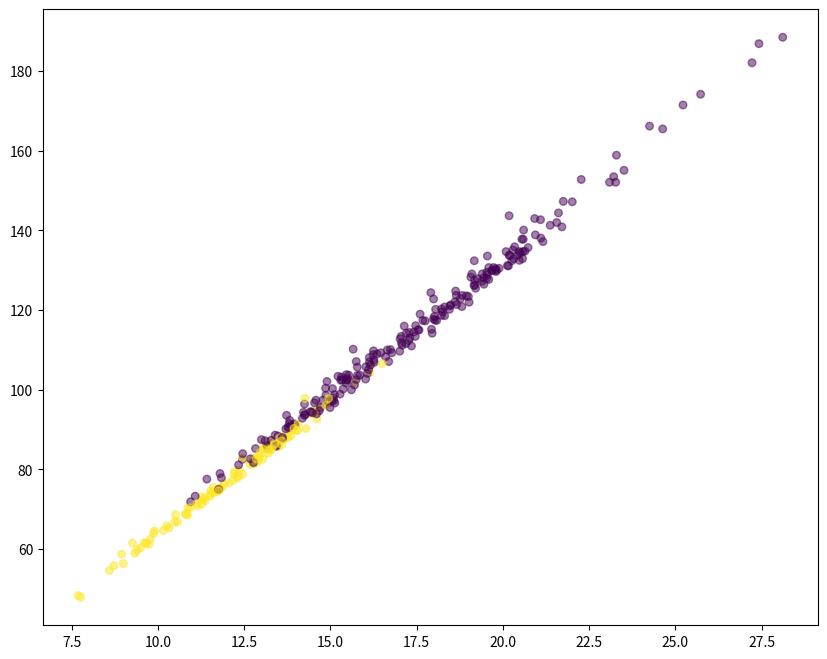

In [16]:
# 목표변수 산점도 확인
plt.figure(figsize=(10,8))
plt.scatter(df_raw['mean_radius'],df_raw['mean_perimeter'],c=df_raw['diagnosis'], s=30, alpha=0.5)
plt.show()

## 모델 생성

### Default option Moel

In [17]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234 )
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

DecisionTreeClassifier(random_state=1234)

Accuracy on training set: 1.000
Accuracy on test set: 0.883


In [18]:
# 실행옵션 확인
print(tree_uncustomized.get_params().keys())
print(tree_uncustomized.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1234, 'best'])


### @max_depth(최대 깊이) 조정에 따른 정확도 변화

In [19]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경. 1~10
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

DecisionTreeClassifier(max_depth=1, random_state=1234)

DecisionTreeClassifier(max_depth=2, random_state=1234)

DecisionTreeClassifier(max_depth=3, random_state=1234)

DecisionTreeClassifier(max_depth=4, random_state=1234)

DecisionTreeClassifier(max_depth=5, random_state=1234)

DecisionTreeClassifier(max_depth=6, random_state=1234)

DecisionTreeClassifier(max_depth=7, random_state=1234)

DecisionTreeClassifier(max_depth=8, random_state=1234)

DecisionTreeClassifier(max_depth=9, random_state=1234)

DecisionTreeClassifier(max_depth=10, random_state=1234)

In [20]:
para_depth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [21]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

Depth  TrainAccuracy  TestAccuracy
0      1          0.932         0.852
1      2          0.979         0.875
2      3          0.995         0.875
3      4          1.000         0.883
4      5          1.000         0.883
5      6          1.000         0.883
6      7          1.000         0.883
7      8          1.000         0.883
8      9          1.000         0.883
9     10          1.000         0.883

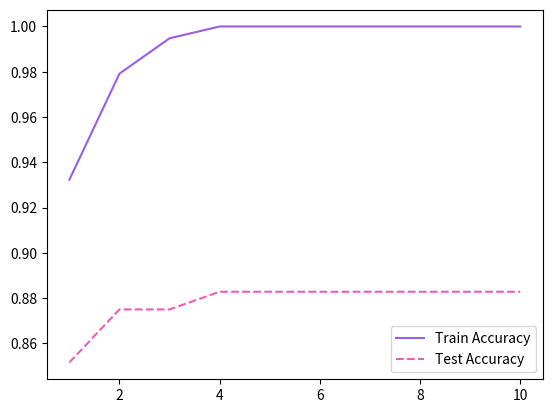

In [22]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

- max_depth = 2 선택

In [23]:
# 변수명 저장
v_feature_name = df_train_x.columns

DecisionTreeClassifier(max_depth=2, random_state=1234)

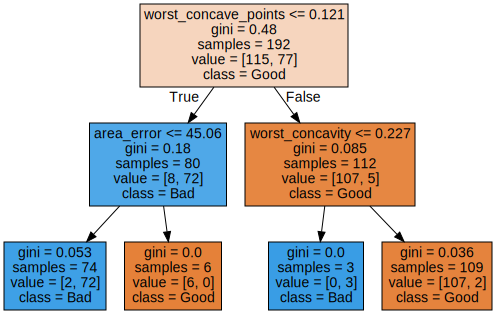

In [24]:
# 깊이가 3인 모델
tree_high = DecisionTreeClassifier(max_depth = 2, random_state=1234)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high, out_file="tree_high.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### @min_samples_split(분리노드의 최소 샘플 수) 조정에 따른 정확도 변화

In [25]:
# @추가: Data 구조 확인
fun_data_layout(df_train_x)

Data 구조: (192, 30)

변수 :  Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')



In [26]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth=6, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

DecisionTreeClassifier(max_depth=6, min_samples_split=10, random_state=1234)

DecisionTreeClassifier(max_depth=6, min_samples_split=20, random_state=1234)

DecisionTreeClassifier(max_depth=6, min_samples_split=30, random_state=1234)

DecisionTreeClassifier(max_depth=6, min_samples_split=40, random_state=1234)

DecisionTreeClassifier(max_depth=6, min_samples_split=50, random_state=1234)

DecisionTreeClassifier(max_depth=6, min_samples_split=60, random_state=1234)

DecisionTreeClassifier(max_depth=6, min_samples_split=70, random_state=1234)

DecisionTreeClassifier(max_depth=6, min_samples_split=80, random_state=1234)

DecisionTreeClassifier(max_depth=6, min_samples_split=90, random_state=1234)

DecisionTreeClassifier(max_depth=6, min_samples_split=100, random_state=1234)

In [27]:
para_split

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [28]:
# 모델 정확도 확인
df_accuracy_split.round(3)

MinSamplesSplit  TrainAccuracy  TestAccuracy
0               10          0.995         0.875
1               20          0.995         0.875
2               30          0.995         0.875
3               40          0.995         0.875
4               50          0.995         0.875
5               60          0.995         0.875
6               70          0.995         0.875
7               80          0.984         0.867
8               90          0.953         0.844
9              100          0.953         0.844

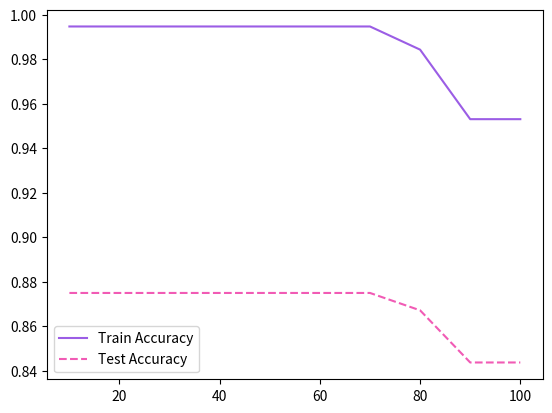

In [29]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

- min_samples_split 선택 한 결과 정확도 떨어짐 확인하여 선택하지 않음

##### @해석 : 80 이상 -> 모델 정확도가 급격히 감소됨

##### 분리 노드의 최소 샘플 수(min_samples_split)에 따른 차이 

DecisionTreeClassifier(max_depth=2, random_state=1234)

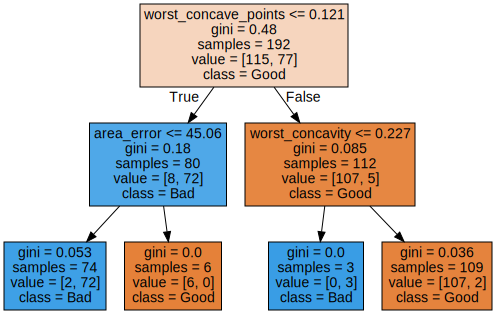

In [30]:
# 분리 노드의 최소 자료 수가 70인 모델
tree_low = DecisionTreeClassifier(max_depth = 2, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### @min_samples_leaf(잎사귀 노드의 샘플 수) 조정에 따른 정확도 변화

In [31]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 노드 최소 자료 수. 2~20
para_leaf = [n_leaf * 2 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, \
		max_depth = 2, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=1234)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=4, random_state=1234)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, random_state=1234)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=8, random_state=1234)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, random_state=1234)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=12, random_state=1234)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=14, random_state=1234)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=16, random_state=1234)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=18, random_state=1234)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=20, random_state=1234)

In [32]:
para_leaf

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [33]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

MinSamplesLeaf  TrainAccuracy  TestAccuracy
0               2          0.979         0.875
1               4          0.974         0.867
2               6          0.964         0.875
3               8          0.958         0.898
4              10          0.953         0.914
5              12          0.943         0.906
6              14          0.932         0.898
7              16          0.932         0.852
8              18          0.932         0.852
9              20          0.932         0.852

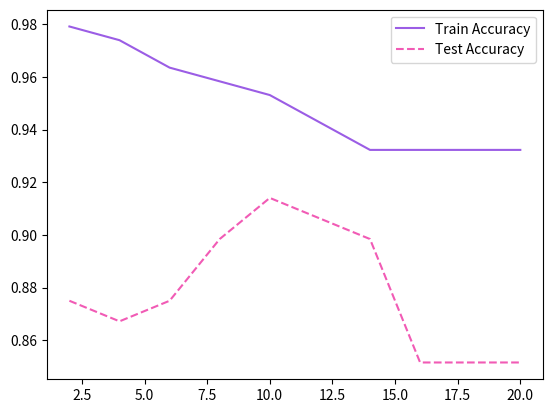

In [34]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

##### @해석 : 10 초과 ->모델 정확도가 급격히 감소됨

DecisionTreeClassifier(max_depth=2, min_samples_leaf=12, random_state=1234)

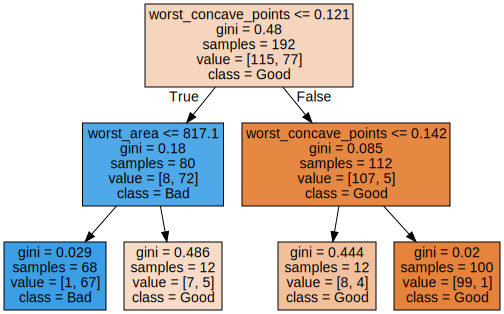

In [35]:
# 잎사귀의 최소 자료 수가 12인 모델
tree_low = DecisionTreeClassifier(max_depth=2, min_samples_leaf=12, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file=" tree_low.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_name, impurity = True, filled = True)

with open(" tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 최종 모델 선정 / 시각화

In [36]:
tree_final = DecisionTreeClassifier(max_depth=2, min_samples_leaf=12, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=12, random_state=1234)

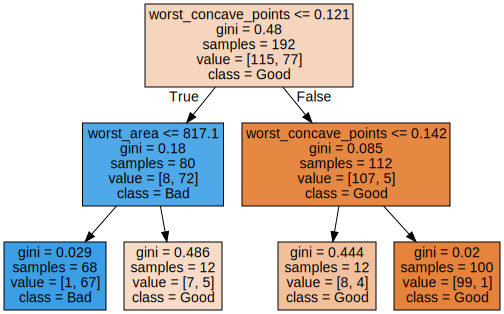

In [37]:
# tree_final.dot으로 결과 저장
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["Good", "Bad"],
# export_graphviz(tree_final, out_file="tree_final.dot", 
                feature_names = v_feature_name, impurity = True, filled = True)
# tree_final.dot 그리기
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [38]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.906

Confusion matrix: 
[[94  3]
 [ 9 22]]
              precision    recall  f1-score   support

           0      0.913     0.969     0.940        97
           1      0.880     0.710     0.786        31

    accuracy                          0.906       128
   macro avg      0.896     0.839     0.863       128
weighted avg      0.905     0.906     0.903       128



#### 설명변수 중요도

In [39]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

Feature  Importance
27     worst_concave_points       0.914
23               worst_area       0.086
0               mean_radius       0.000
1              mean_texture       0.000
28           worst_symmetry       0.000
26          worst_concavity       0.000
25        worst_compactness       0.000
24         worst_smoothness       0.000
22          worst_perimeter       0.000
21            worst_texture       0.000
20             worst_radius       0.000
19  fractal_dimension_error       0.000
18           symmetry_error       0.000
17     concave_points_error       0.000
16          concavity_error       0.000
15        compactness_error       0.000
14         smoothness_error       0.000
13               area_error       0.000
12          perimeter_error       0.000
11            texture_error       0.000
10             radius_error       0.000
9    mean_fractal_dimension       0.000
8             mean_symmetry       0.000
7       mean_concave_points       0.000
6            mean_concavity       0.000
5          mean_compactness       0.000
4           mean_smoothness       0.000
3                 mean_area       0.000
2            mean_perimeter       0.000
29  worst_fractal_dimension       0.000

<Figure size 1000x500 with 0 Axes>

<BarContainer object of 30 artists>

([<matplotlib.axis.YTick at 0x7f5fa2f5acd0>,
 [Text(0, 0, 'concavity_error'),
  Text(0, 1, 'mean_area'),
  Text(0, 2, 'mean_smoothness'),
  Text(0, 3, 'mean_compactness'),
  Text(0, 4, 'mean_concavity'),
  Text(0, 5, 'mean_concave_points'),
  Text(0, 6, 'mean_symmetry'),
  Text(0, 7, 'mean_fractal_dimension'),
  Text(0, 8, 'radius_error'),
  Text(0, 9, 'texture_error'),
  Text(0, 10, 'perimeter_error'),
  Text(0, 11, 'area_error'),
  Text(0, 12, 'smoothness_error'),
  Text(0, 13, 'compactness_error'),
  Text(0, 14, 'worst_fractal_dimension'),
  Text(0, 15, 'concave_points_error'),
  Text(0, 16, 'symmetry_error'),
  Text(0, 17, 'fractal_dimension_error'),
  Text(0, 18, 'worst_radius'),
  Text(0, 19, 'worst_texture'),
  Text(0, 20, 'worst_perimeter'),
  Text(0, 21, 'worst_smoothness'),
  Text(0, 22, 'worst_compactness'),
  Text(0, 23, 'worst_concavity'),
  Text(0, 24, 'worst_symmetry'),
  Text(0, 25, 'mean_texture'),
  Text(0, 26, 'mean_radius'),
  Text(0, 27, 'mean_perimeter'),
  Text(0

Text(0.5, 0, '설명변수 중요도')

Text(0, 0.5, '설명변수')

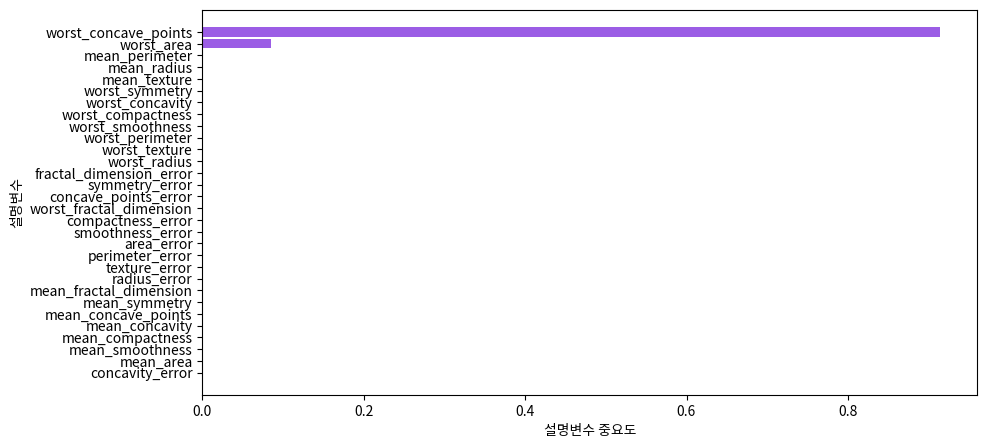

In [40]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))

plt.figure(figsize=(10,5))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## Grid Search
* Tree 모델의 hyper-parameter의 최적값 탐색
* grid(값의 격자) 방식으로 값을 변경/조합하면서 모델의 성능 비교
* 반복 모델 생성시 CV(cross-validation) 방식으로 data 선택 -> 개별 모델과 최적값이 다를 수 있음  

In [41]:
estimator = DecisionTreeClassifier()
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 정확도가 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                              20],
                         'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80,
                                               90, 100]},
             scoring='accuracy')

best estimator model: 
DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=50)

best parameter: 
{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 50}

best score: 
0.948


 - 결론: 최종 모델 선정 
         max_depth : 2, min_sample_leaf : 12, 정확도 : 0.906
 - Grid Search: 0.948을 가져 추천해서 얻은 
         best parameter: 
   {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 50} 모델 선택         

# 2랜덤포레스트_분류

## 데이터 구성 및 전처리

In [42]:
df_raw = pd.read_csv(path2+"유방암.csv",encoding='euc-kr')
df_raw

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0          음성        15.12         16.68           98.78      716.6   
1          양성        10.80          9.71           68.77      357.6   
2          음성        18.31         18.58          118.60     1041.0   
3          양성        14.92         14.93           96.45      686.9   
4          양성        12.89         13.12           81.89      515.9   
..        ...          ...           ...             ...        ...   
315        음성        19.55         23.21          128.90     1174.0   
316        음성        19.10         26.29          129.10     1132.0   
317        음성        24.25         20.20          166.20     1761.0   
318        음성        19.17         24.80          132.40     1123.0   
319        양성        11.76         21.60           74.72      427.9   

     mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0            0.08876           0.09588         0.07550              0.04079   
1            0.09594           0.05736         0.02531              0.01698   
2            0.08588           0.08468         0.08169              0.05814   
3            0.08098           0.08549         0.05539              0.03221   
4            0.06955           0.03729         0.02260              0.01171   
..               ...               ...             ...                  ...   
315          0.10100           0.13180         0.18560              0.10210   
316          0.12150           0.17910         0.19370              0.14690   
317          0.14470           0.28670         0.42680              0.20120   
318          0.09740           0.24580         0.20650              0.11180   
319          0.08637           0.04966         0.01657              0.01115   

     mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0           0.1594  ...         17.77          20.24           117.70   
1           0.1381  ...         11.60          12.02            73.66   
2           0.1621  ...         21.31          26.36           139.20   
3           0.1687  ...         17.18          18.22           112.00   
4           0.1337  ...         13.62          15.54            87.40   
..             ...  ...           ...            ...              ...   
315         0.1989  ...         20.82          30.44           142.00   
316         0.1634  ...         20.33          32.72           141.30   
317         0.2655  ...         26.02          23.99           180.90   
318         0.2397  ...         20.96          29.94           151.70   
319         0.1495  ...         12.98          25.72            82.98   

     worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0         989.5           0.14910            0.33310          0.33270   
1         414.0           0.14360            0.12570          0.10470   
2        1410.0           0.12340            0.24450          0.35380   
3         906.6           0.10650            0.27910          0.31510   
4         577.0           0.09616            0.11470          0.11860   
..          ...               ...                ...              ...   
315      1313.0           0.12510            0.24140          0.38290   
316      1298.0           0.13920            0.28170          0.24320   
317      2073.0           0.16960            0.42440          0.58030   
318      1332.0           0.10370            0.39030          0.36390   
319       516.5           0.10850            0.08615          0.05523   

     worst_concave_points  worst_symmetry  worst_fractal_dimension  
0                 0.12520          0.3415                  0.09740  
1                 0.04603          0.2090                  0.07699  
2                 0.15710          0.3206                  0.06938  
3                 0.11470          0.2688                  0.08273  
4                 0.05366          0.2309                  0.06915  
..                    ...         

In [43]:
df_raw.diagnosis.replace({'음성':0, '양성':1}, inplace=True)

In [44]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (320, 30)
분할 후 설명변수 데이터 :Train (192, 30)   Test (128, 30)


## 모델 생성

### Default option Moel

In [45]:
# 랜덤 포레스트 모델 생성: RandomForestClassifier
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

RandomForestClassifier(random_state=1234)

Accuracy on training set: 1.000
Accuracy on test set: 0.922


### @n_estimators(생성 트리 수) 조정에 따른 정확도 변화

In [46]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경: 1~150
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

RandomForestClassifier(n_estimators=10, random_state=1234)

RandomForestClassifier(n_estimators=20, random_state=1234)

RandomForestClassifier(n_estimators=30, random_state=1234)

RandomForestClassifier(n_estimators=40, random_state=1234)

RandomForestClassifier(n_estimators=50, random_state=1234)

RandomForestClassifier(n_estimators=60, random_state=1234)

RandomForestClassifier(n_estimators=70, random_state=1234)

RandomForestClassifier(n_estimators=80, random_state=1234)

RandomForestClassifier(n_estimators=90, random_state=1234)

RandomForestClassifier(random_state=1234)

RandomForestClassifier(n_estimators=110, random_state=1234)

RandomForestClassifier(n_estimators=120, random_state=1234)

RandomForestClassifier(n_estimators=130, random_state=1234)

RandomForestClassifier(n_estimators=140, random_state=1234)

RandomForestClassifier(n_estimators=150, random_state=1234)

In [47]:
para_n_tree

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

In [48]:
# 모델 정확도 확인
df_accuracy_n.round(3)

n_estimators  TrainAccuracy  TestAccuracy
0             10          1.000         0.922
1             20          0.995         0.906
2             30          1.000         0.914
3             40          1.000         0.914
4             50          1.000         0.922
5             60          1.000         0.922
6             70          1.000         0.914
7             80          1.000         0.914
8             90          1.000         0.922
9            100          1.000         0.922
10           110          1.000         0.922
11           120          1.000         0.930
12           130          1.000         0.930
13           140          1.000         0.930
14           150          1.000         0.930

Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'accuracy')

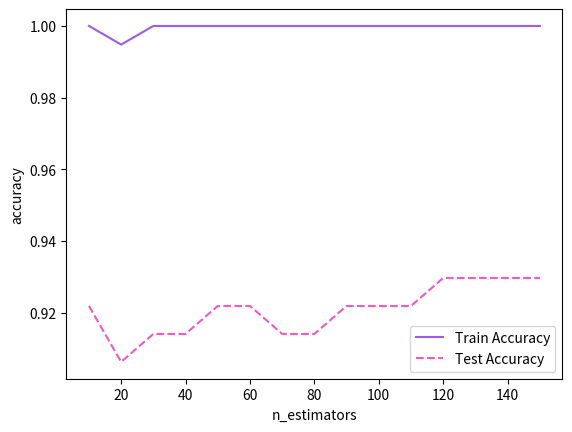

In [49]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()


In [50]:
# error 저장 리스트
oob_error = []

for v_n_estimator in range(1, 151):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state= 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

RandomForestClassifier(n_estimators=1, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=2, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=3, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=4, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=5, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=6, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=7, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=8, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=9, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=11, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=12, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=13, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=14, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=15, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=16, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=17, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=18, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=19, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=20, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=21, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=22, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=23, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=24, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=25, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=26, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=27, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=28, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=29, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=30, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=31, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=32, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=33, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=34, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=35, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=36, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=37, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=38, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=39, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=40, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=41, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=42, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=43, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=44, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=45, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=46, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=47, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=48, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=49, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=51, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=52, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=53, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=54, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=55, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=56, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=57, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=58, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=59, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=60, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=61, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=62, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=63, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=64, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=65, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=66, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=67, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=68, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=69, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=70, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=71, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=72, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=73, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=74, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=75, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=76, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=77, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=78, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=79, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=80, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=81, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=82, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=83, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=84, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=85, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=86, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=87, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=88, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=89, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=90, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=91, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=92, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=93, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=94, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=95, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=96, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=97, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=98, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=99, oob_score=True, random_state=1234)

RandomForestClassifier(oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=101, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=102, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=103, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=104, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=105, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=106, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=107, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=108, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=109, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=110, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=111, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=112, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=113, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=114, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=115, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=116, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=117, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=118, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=119, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=120, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=121, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=122, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=123, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=124, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=125, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=126, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=127, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=128, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=129, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=130, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=131, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=132, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=133, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=134, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=135, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=136, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=137, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=138, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=139, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=140, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=141, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=142, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=143, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=144, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=145, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=146, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=147, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=148, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=149, oob_score=True, random_state=1234)

RandomForestClassifier(n_estimators=150, oob_score=True, random_state=1234)

Text(0, 0.5, 'oob error')

Text(0.5, 0, 'n_estimators')

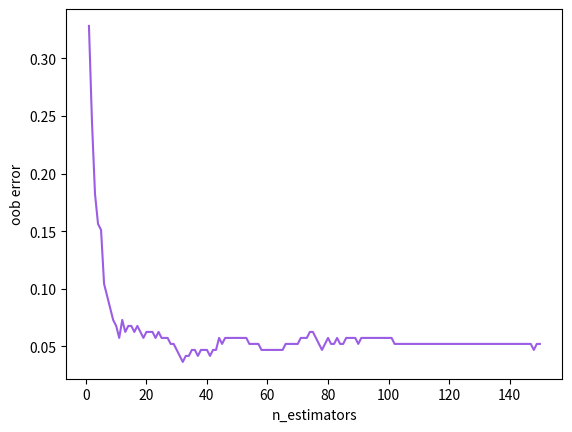

In [51]:
# 그래프로 표현
plt.plot(range(1, 151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

In [52]:
# 임의로 지정
n_estimators = 90

### @max_depth(최대 깊이) 조정에 따른 정확도 변화

In [53]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators=90, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy


RandomForestClassifier(max_depth=1, n_estimators=90, random_state=1234)

RandomForestClassifier(max_depth=2, n_estimators=90, random_state=1234)

RandomForestClassifier(max_depth=3, n_estimators=90, random_state=1234)

RandomForestClassifier(max_depth=4, n_estimators=90, random_state=1234)

RandomForestClassifier(max_depth=5, n_estimators=90, random_state=1234)

RandomForestClassifier(max_depth=6, n_estimators=90, random_state=1234)

RandomForestClassifier(max_depth=7, n_estimators=90, random_state=1234)

RandomForestClassifier(max_depth=8, n_estimators=90, random_state=1234)

RandomForestClassifier(max_depth=9, n_estimators=90, random_state=1234)

RandomForestClassifier(max_depth=10, n_estimators=90, random_state=1234)

In [54]:
para_depth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [55]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

Depth  TrainAccuracy  TestAccuracy
0      1          0.953         0.922
1      2          0.974         0.906
2      3          0.990         0.914
3      4          1.000         0.914
4      5          1.000         0.922
5      6          1.000         0.922
6      7          1.000         0.922
7      8          1.000         0.922
8      9          1.000         0.922
9     10          1.000         0.922

Text(0.5, 0, 'max depth')

Text(0, 0.5, 'accuracy')

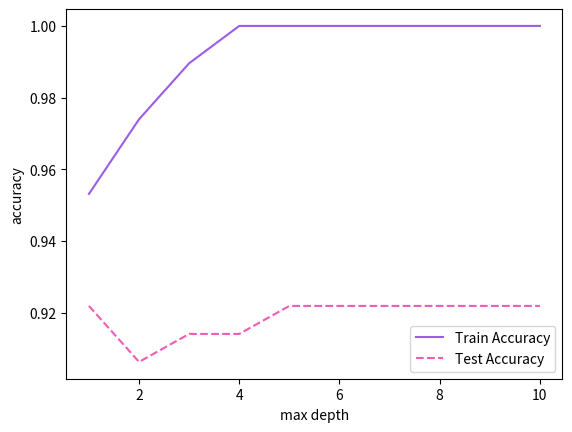

In [56]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

In [57]:
# 최대 깊이 지정
max_depth = 3

### @min_samples_split(분할 노드의 최소 샘플 수) 조정에 따른 정확도 변화

In [58]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수. 10~100
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth=6,
                                n_estimators=100, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

RandomForestClassifier(max_depth=6, min_samples_split=10, random_state=1234)

RandomForestClassifier(max_depth=6, min_samples_split=20, random_state=1234)

RandomForestClassifier(max_depth=6, min_samples_split=30, random_state=1234)

RandomForestClassifier(max_depth=6, min_samples_split=40, random_state=1234)

RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=1234)

RandomForestClassifier(max_depth=6, min_samples_split=60, random_state=1234)

RandomForestClassifier(max_depth=6, min_samples_split=70, random_state=1234)

RandomForestClassifier(max_depth=6, min_samples_split=80, random_state=1234)

RandomForestClassifier(max_depth=6, min_samples_split=90, random_state=1234)

RandomForestClassifier(max_depth=6, min_samples_split=100, random_state=1234)

In [59]:
para_split

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [60]:
# 테이블 결과
df_accuracy_split.round(3)

MinSamplesSplit  TrainAccuracy  TestAccuracy
0               10          0.990         0.906
1               20          0.984         0.914
2               30          0.984         0.914
3               40          0.979         0.906
4               50          0.984         0.906
5               60          0.964         0.891
6               70          0.953         0.898
7               80          0.953         0.922
8               90          0.953         0.922
9              100          0.953         0.922

Text(0.5, 0, 'min samples split')

Text(0, 0.5, 'accuracy')

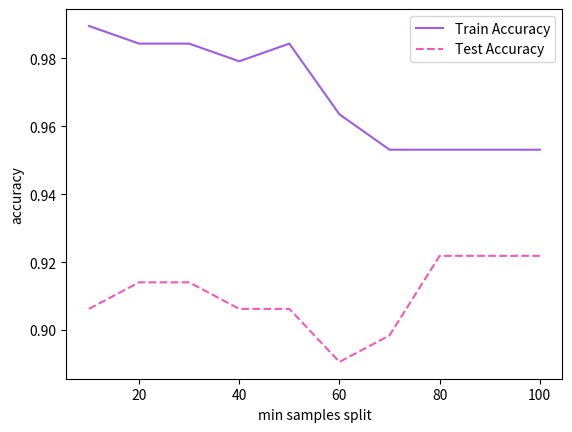

In [61]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

- min_samples_split 선택 한 결과 정확도 떨어짐 확인하여 선택하지 않음

In [62]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,
                                max_depth=3, n_estimators=90, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=90,
                       random_state=1234)

RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=90,
                       random_state=1234)

RandomForestClassifier(max_depth=3, min_samples_leaf=15, n_estimators=90,
                       random_state=1234)

RandomForestClassifier(max_depth=3, min_samples_leaf=20, n_estimators=90,
                       random_state=1234)

RandomForestClassifier(max_depth=3, min_samples_leaf=25, n_estimators=90,
                       random_state=1234)

RandomForestClassifier(max_depth=3, min_samples_leaf=30, n_estimators=90,
                       random_state=1234)

RandomForestClassifier(max_depth=3, min_samples_leaf=35, n_estimators=90,
                       random_state=1234)

RandomForestClassifier(max_depth=3, min_samples_leaf=40, n_estimators=90,
                       random_state=1234)

RandomForestClassifier(max_depth=3, min_samples_leaf=45, n_estimators=90,
                       random_state=1234)

RandomForestClassifier(max_depth=3, min_samples_leaf=50, n_estimators=90,
                       random_state=1234)

In [63]:
para_leaf

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [64]:
# 테이블 결과
df_accuracy_leaf.round(3)

MinSamplesLeaf  TrainAccuracy  TestAccuracy
0               5          0.984         0.906
1              10          0.969         0.906
2              15          0.958         0.914
3              20          0.958         0.914
4              25          0.958         0.914
5              30          0.948         0.898
6              35          0.948         0.906
7              40          0.953         0.922
8              45          0.953         0.914
9              50          0.958         0.914

Text(0.5, 0, 'min samples leaf')

Text(0, 0.5, 'accuracy')

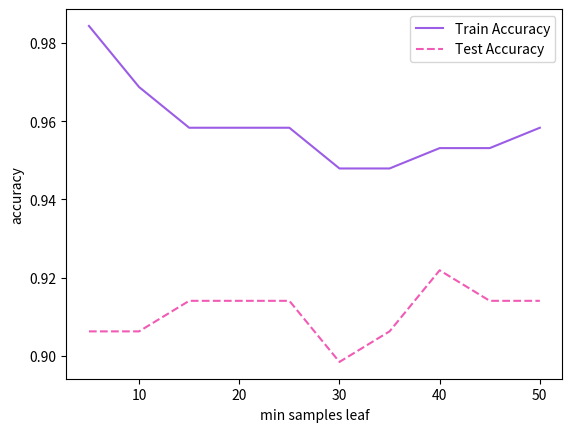

In [65]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

In [66]:
# 임의로 지정
min_samples_leaf = 25

In [67]:
# 최종 모델
rf_final = RandomForestClassifier(max_depth=3, n_estimators=90,min_samples_leaf = 25,
                                  random_state=1234)
rf_final.fit(df_train_x, df_train_y)
# 평가
y_pred = rf_final.predict(df_test_x)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

RandomForestClassifier(max_depth=3, min_samples_leaf=25, n_estimators=90,
                       random_state=1234)

Accuracy on training set: 0.958
Accuracy on test set: 0.914

Confusion matrix: 
[[92  5]
 [ 6 25]]
              precision    recall  f1-score   support

           0      0.939     0.948     0.944        97
           1      0.833     0.806     0.820        31

    accuracy                          0.914       128
   macro avg      0.886     0.877     0.882       128
weighted avg      0.913     0.914     0.914       128



#### 설명변수 중요도

In [68]:
# 변수명
v_feature_names = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = rf_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

Feature  Importance
22          worst_perimeter       0.154
6            mean_concavity       0.136
27     worst_concave_points       0.132
7       mean_concave_points       0.114
20             worst_radius       0.096
23               worst_area       0.087
2            mean_perimeter       0.061
26          worst_concavity       0.060
3                 mean_area       0.040
0               mean_radius       0.033
5          mean_compactness       0.024
13               area_error       0.020
17     concave_points_error       0.016
12          perimeter_error       0.010
4           mean_smoothness       0.003
21            worst_texture       0.002
9    mean_fractal_dimension       0.002
10             radius_error       0.002
28           worst_symmetry       0.001
19  fractal_dimension_error       0.001
8             mean_symmetry       0.001
18           symmetry_error       0.001
1              mean_texture       0.001
24         worst_smoothness       0.001
16          concavity_error       0.001
15        compactness_error       0.001
11            texture_error       0.000
29  worst_fractal_dimension       0.000
25        worst_compactness       0.000
14         smoothness_error       0.000

<BarContainer object of 30 artists>

([<matplotlib.axis.YTick at 0x7f5fa01aa760>,
 [Text(0, 0, 'smoothness_error'),
  Text(0, 1, 'worst_compactness'),
  Text(0, 2, 'worst_fractal_dimension'),
  Text(0, 3, 'texture_error'),
  Text(0, 4, 'compactness_error'),
  Text(0, 5, 'concavity_error'),
  Text(0, 6, 'worst_smoothness'),
  Text(0, 7, 'mean_texture'),
  Text(0, 8, 'symmetry_error'),
  Text(0, 9, 'mean_symmetry'),
  Text(0, 10, 'fractal_dimension_error'),
  Text(0, 11, 'worst_symmetry'),
  Text(0, 12, 'radius_error'),
  Text(0, 13, 'mean_fractal_dimension'),
  Text(0, 14, 'worst_texture'),
  Text(0, 15, 'mean_smoothness'),
  Text(0, 16, 'perimeter_error'),
  Text(0, 17, 'concave_points_error'),
  Text(0, 18, 'area_error'),
  Text(0, 19, 'mean_compactness'),
  Text(0, 20, 'mean_radius'),
  Text(0, 21, 'mean_area'),
  Text(0, 22, 'worst_concavity'),
  Text(0, 23, 'mean_perimeter'),
  Text(0, 24, 'worst_area'),
  Text(0, 25, 'worst_radius'),
  Text(0, 26, 'mean_concave_points'),
  Text(0, 27, 'worst_concave_points'),
  Text(

Text(0.5, 0, '설명변수 중요도')

Text(0, 0.5, '설명변수')

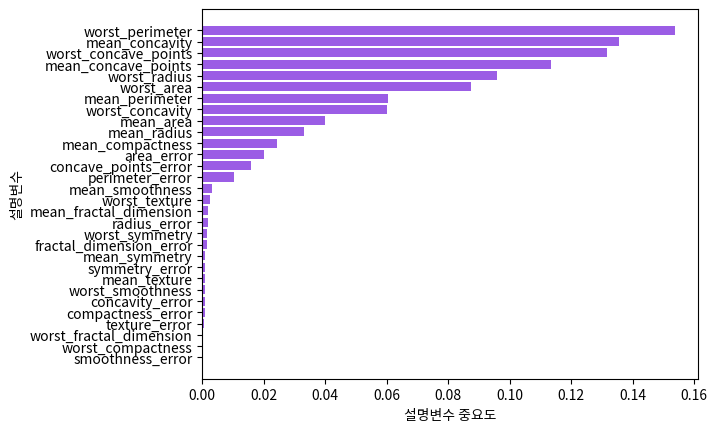

In [69]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

#### GridSearchCV를 이용한 최적 parameter 찾기

In [70]:
estimator = RandomForestClassifier(n_estimators=90,random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth,
              "min_samples_leaf": para_leaf}
# 정확도가 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

GridSearchCV(estimator=RandomForestClassifier(n_estimators=90,
                                              random_state=1234),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                              50]},
             scoring='accuracy')

best estimator model: 
RandomForestClassifier(max_depth=1, min_samples_leaf=35, n_estimators=90,
                       random_state=1234)

best parameter: 
{'max_depth': 1, 'min_samples_leaf': 35}

best score: 
0.953


- 결론: max_depth=3, n_estimators=90,min_samples_leaf = 25 추천 ==> 정확도 91.4%
- Grid Search: 0.953을 가져 추천해서 얻은

  best parameter: 

    {'max_depth': , 'min_samples_leaf': 35, n_estimators=90} 모델 선택